# IDA Credits and Loans : Data Cleaning

Importing the necessary dependencies 


In [1]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
#import altair as alt
pd.set_option('display.max_columns', 40)
#pd.set_option('display.max_rows', 5000)



In [2]:
from datetime import datetime

In [3]:
df = pd.read_csv('ida.csv', index_col = 'Project ID', infer_datetime_format = True)

In [4]:
df.head()

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IDA,Due to IDA,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Credits Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
Project ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P007335,05/31/2020 12:00:00 AM,IDA00010,LATIN AMERICA AND CARIBBEAN,HN,Honduras,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,WESTERN HIGHWAY,"9,000,000","572,026.03",0,"8,427,973.97","8,427,973.97",0,0,0,0,0,0,0,09/01/1971 12:00:00 AM,03/01/2011 12:00:00 AM,05/12/1961 12:00:00 AM,05/11/1961 12:00:00 AM,06/29/1961 12:00:00 AM,07/31/1967 12:00:00 AM,NaN
P002553,05/31/2020 12:00:00 AM,IDA00020,AFRICA,SD,Sudan,Ministry of Finance and National Economy,Repaying,0.75,USD,ROSEIRES IRRIGATION,"15,509,696.87","633,197.93",0,"14,876,498.94","7,502,114.12","7,374,384.82",0,"7,374,384.82",0,0,0,"7,374,384.82",07/15/1971 12:00:00 AM,01/15/2011 12:00:00 AM,06/14/1961 12:00:00 AM,06/13/1961 12:00:00 AM,10/19/1961 12:00:00 AM,12/31/1971 12:00:00 AM,NaN
P009610,05/31/2020 12:00:00 AM,IDA00030,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,Fully Repaid,0.75,USD,HIGHWAYS,"72,112,713.47","530,000",0,"71,582,713.47","71,582,713.47",0,0,0,0,0,0,0,08/15/1971 12:00:00 AM,02/15/2011 12:00:00 AM,06/21/1961 12:00:00 AM,06/20/1961 12:00:00 AM,08/25/1961 12:00:00 AM,06/30/1967 12:00:00 AM,NaN
P006585,05/31/2020 12:00:00 AM,IDA00040,LATIN AMERICA AND CARIBBEAN,CL,Chile,MINISTERIO DE OBRAS PUBLICAS,Fully Repaid,0.75,USD,ROAD CONSTRUCTION,"22,878,919.07","2,244.58",0,"22,876,674.49","22,876,674.49",0,0,0,0,0,0,0,12/01/1971 12:00:00 AM,06/01/2011 12:00:00 AM,06/28/1961 12:00:00 AM,06/27/1961 12:00:00 AM,12/21/1961 12:00:00 AM,12/31/1968 12:00:00 AM,NaN
P006701,05/31/2020 12:00:00 AM,IDA00050,LATIN AMERICA AND CARIBBEAN,CO,Colombia,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,ROAD CONSTRUCTION,"23,480,995.92",0,0,"23,480,995.92","23,480,995.92",0,0,0,0,0,0,0,12/01/1971 12:00:00 AM,06/01/2011 12:00:00 AM,08/28/1961 12:00:00 AM,08/15/1961 12:00:00 AM,11/25/1961 12:00:00 AM,12/31/1968 12:00:00 AM,NaN


In [5]:
mask = df.isnull()
total= mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis= 1, join = 'outer', keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by= 'perc_missing', ascending= False, inplace = True)
missing_data.head(10)

,count_missing,perc_missing
Last Disbursement Date,1911,21.219187
Service Charge Rate,1732,19.231623
Last Repayment Date,1635,18.154564
First Repayment Date,1635,18.154564
Agreement Signing Date,175,1.943149
Effective Date (Most Recent),133,1.476793
Closed Date (Most Recent),9,0.099933
Board Approval Date,7,0.077726
Project Name,1,0.011104
Exchange Adjustment,0,0.000000


In [6]:
nullable_columns = df.columns[mask.any()].tolist()

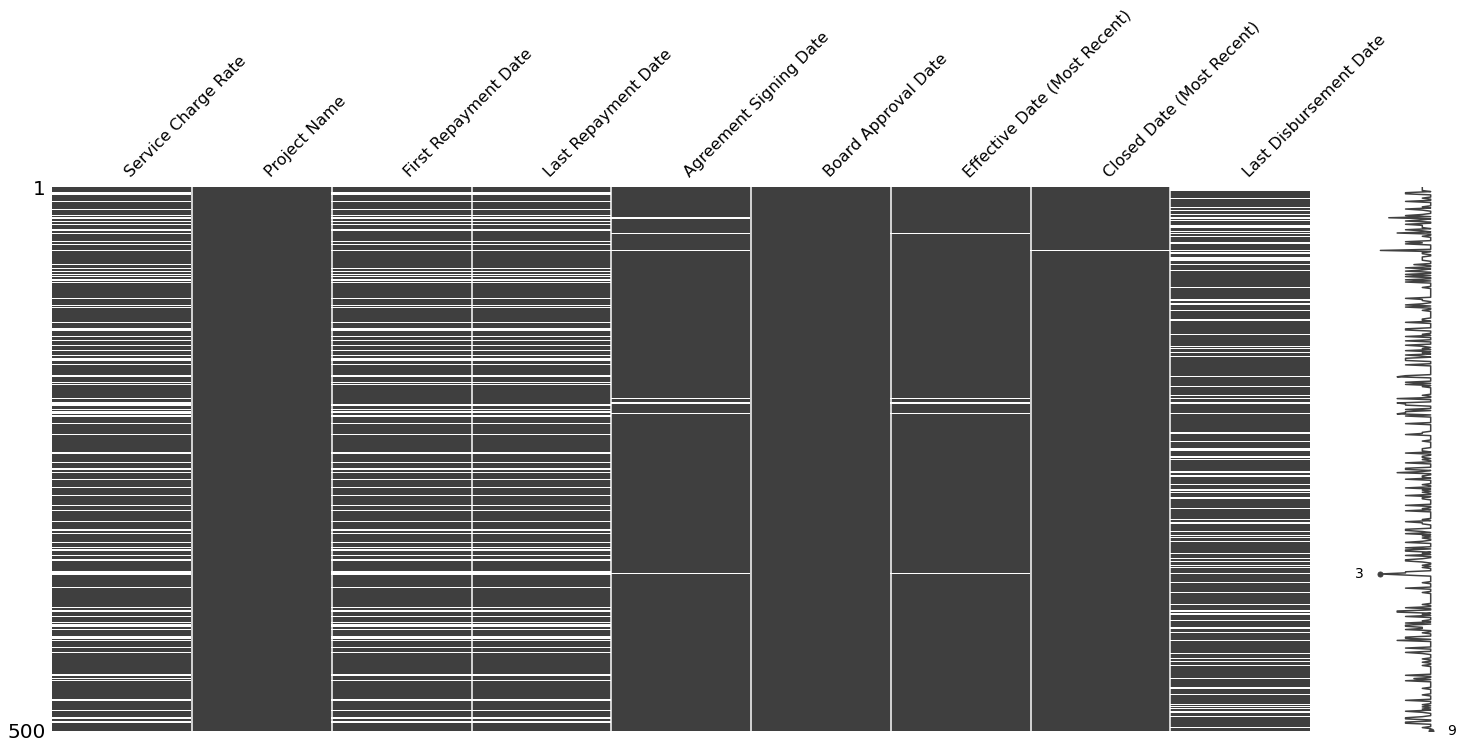

In [7]:
fig=msno.matrix(df[nullable_columns].sample(500))

In [8]:
fig_copy = fig.get_figure() 

fig_copy.savefig('./Plots/nullity.png')

### Coming to Terms with Missing Values 

In [9]:
df = df.dropna(axis = 0, how = 'any')

In [10]:
df.head(2)

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IDA,Due to IDA,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Credits Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
Project ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P000486,05/31/2020 12:00:00 AM,IDA04891,AFRICA,TD,Chad,Ministere des Finances et du Budget,Fully Repaid,0.75,USD,IRRIG. SATEGUI DERES,"8,000,000","47,823.15",0,"7,952,176.85","7,952,176.85",0,0,0,0,0,0,0,06/01/1984 12:00:00 AM,12/01/2023 12:00:00 AM,10/07/1976 12:00:00 AM,08/10/1976 12:00:00 AM,02/09/1977 12:00:00 AM,06/30/1987 12:00:00 AM,07/08/1991 12:00:00 AM
P000493,05/31/2020 12:00:00 AM,IDA07390,AFRICA,TD,Chad,Ministere des Finances et du Budget,Fully Repaid,0.75,USD,SAHELIAN ZONE PROJEC,"1,900,000",0,0,"1,900,000","1,900,000",0,0,0,0,0,0,0,12/01/1987 12:00:00 AM,06/01/2027 12:00:00 AM,09/28/1977 12:00:00 AM,09/06/1977 12:00:00 AM,05/15/1978 12:00:00 AM,06/30/1987 12:00:00 AM,09/22/1987 12:00:00 AM


In [11]:
df.dtypes

End of Period                    object
Credit Number                    object
Region                           object
Country Code                     object
Country                          object
Borrower                         object
Credit Status                    object
Service Charge Rate             float64
Currency of Commitment           object
Project Name                     object
Original Principal Amount        object
Cancelled Amount                 object
Undisbursed Amount               object
Disbursed Amount                 object
Repaid to IDA                    object
Due to IDA                       object
Exchange Adjustment               int64
Borrower's Obligation            object
Sold 3rd Party                   object
Repaid 3rd Party                 object
Due 3rd Party                     int64
Credits Held                     object
First Repayment Date             object
Last Repayment Date              object
Agreement Signing Date           object


##### The row of the loan without project name

In [12]:
df['End of Period'].unique()

array(['05/31/2020 12:00:00 AM'], dtype=object)

In [13]:
df['End of Period'] = df['End of Period'].apply(lambda x: x.split(" ")[0])

In [14]:
df['End of Period'] = pd.to_datetime(df['End of Period'])

In [15]:
df['End of Period']

Project ID
P000486   2020-05-31
P000493   2020-05-31
P010115   2020-05-31
P000257   2020-05-31
P002573   2020-05-31
             ...    
P010496   2020-05-31
P035827   2020-05-31
P037294   2020-05-31
P045050   2020-05-31
P059501   2020-05-31
Name: End of Period, Length: 5642, dtype: datetime64[ns]

####  Writing a simple function to split date objects and convert them

In [16]:
def date_parser(col):
    c = col.apply(lambda x: x.split(" ")[0])
    return pd.to_datetime(c)

##### Checking whether it worked before going further

In [17]:
df['Agreement Signing Date']= date_parser(df['Agreement Signing Date'])

In [18]:
len(df.columns)

29

In [19]:
for col in df[["First Repayment Date", "Last Repayment Date", 
               "Board Approval Date", "Effective Date (Most Recent)",
                "Closed Date (Most Recent)", "Last Disbursement Date" ]]:
    df[col] = df[col].apply(lambda col: col.split(" ")[0])
    df[col] = pd.to_datetime(df[col])

In [20]:
df.columns

Index(['End of Period', 'Credit Number', 'Region', 'Country Code', 'Country',
       'Borrower', 'Credit Status', 'Service Charge Rate',
       'Currency of Commitment', 'Project Name', 'Original Principal Amount',
       'Cancelled Amount', 'Undisbursed Amount', 'Disbursed Amount',
       'Repaid to IDA', 'Due to IDA', 'Exchange Adjustment',
       'Borrower's Obligation', 'Sold 3rd Party', 'Repaid 3rd Party',
       'Due 3rd Party', 'Credits Held', 'First Repayment Date',
       'Last Repayment Date', 'Agreement Signing Date', 'Board Approval Date',
       'Effective Date (Most Recent)', 'Closed Date (Most Recent)',
       'Last Disbursement Date'],
      dtype='object')

### Dropping columns that are irrelevant for the present analysis 

In [21]:
##### Checking columns with numerous 0-values to asssess their relevance 
##### 5 Cases of Debt solds to third Party and repaid by the same 
#####  The columns Sold to Third Party and Repaid by Third Party seem to be relevant categories  

In [22]:
for col in df[[ "Cancelled Amount", "Undisbursed Amount", 
                "Disbursed Amount", "Repaid to IDA", "Due to IDA",
                "Borrower's Obligation", "Sold 3rd Party", 
                "Repaid 3rd Party", "Credits Held", "Original Principal Amount"
              ]]:
    #print(df[col].dtypes)
    df[col] = df[col].apply(lambda x : x.replace("," , ""))
    df[col] = pd.to_numeric(df[col])
    
    
    

In [23]:
df.head(2)

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IDA,Due to IDA,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Credits Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
Project ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P000486,2020-05-31,IDA04891,AFRICA,TD,Chad,Ministere des Finances et du Budget,Fully Repaid,0.75,USD,IRRIG. SATEGUI DERES,8000000.0,47823.15,0.0,7952176.85,7952176.85,0.0,0,0.0,0.0,0.0,0,0.0,1984-06-01,2023-12-01,1976-10-07,1976-08-10,1977-02-09,1987-06-30,1991-07-08
P000493,2020-05-31,IDA07390,AFRICA,TD,Chad,Ministere des Finances et du Budget,Fully Repaid,0.75,USD,SAHELIAN ZONE PROJEC,1900000.0,0.00,0.0,1900000.00,1900000.00,0.0,0,0.0,0.0,0.0,0,0.0,1987-12-01,2027-06-01,1977-09-28,1977-09-06,1978-05-15,1987-06-30,1987-09-22


In [24]:
df.to_csv('ida_cleaned.csv', index = False)